In [20]:
import tensorflow as tf
tf.config.run_functions_eagerly(True)
tf.compat.v1.enable_eager_execution()
from tensorflow import keras
from tensorflow.keras import layers
import matplotlib.pyplot as plt
import numpy as np

np.random.seed(42)
X = np.random.uniform(-2, 2, (1000, 1))
y = np.sin(3 * X) + 0.3 * np.random.randn(1000, 1)

X_train, X_val = X[:800], X[800:]
y_train, y_val = y[:800], y[800:]

In [21]:
def build_plain_mlp():
    inputs = keras.Input(shape=(1,))
    x = layers.Dense(64, activation='relu')(inputs)
    x = layers.Dense(64, activation='relu')(x)
    outputs = layers.Dense(1)(x)
    return keras.Model(inputs, outputs, name="plain_mlp")

def build_residual_mlp():
    inputs = keras.Input(shape=(1,))
    x = layers.Dense(64, activation='relu')(inputs)
    skip = x 
    x = layers.Dense(64, activation='relu')(x)
    x = layers.Add()([x, skip]) 
    x = layers.Dense(64, activation='relu')(x)
    outputs = layers.Dense(1)(x)
    return keras.Model(inputs, outputs, name="residual_mlp")

In [22]:
plain_model = build_plain_mlp()
res_model = build_residual_mlp()

plain_model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
                    loss='mse')

res_model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
                  loss='mse')


In [23]:
history_plain = plain_model.fit(X_train, y_train, epochs=100, validation_data=(X_val, y_val),
                                verbose=1)

Epoch 1/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 61s 233ms/step - loss: 0.6174 - val_loss: 0.5330
Epoch 2/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 29s 297ms/step - loss: 0.4991 - val_loss: 0.4531
Epoch 3/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 8s 216ms/step - loss: 0.4230 - val_loss: 0.3796
Epoch 4/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 10s 204ms/step - loss: 0.3462 - val_loss: 0.3114
Epoch 5/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 5s 215ms/step - loss: 0.2724 - val_loss: 0.2368
Epoch 6/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 5s 192ms/step - loss: 0.2130 - val_loss: 0.1900
Epoch 7/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 5s 193ms/step - loss: 0.1749 - val_loss: 0.1609
Epoch 8/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 6s 217ms/step - loss: 0.1582 - val_loss: 0.1625
Epoch 9/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 7s 287ms/step - loss: 0.1494 - val_loss: 0.1515
Epoch 10/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 10s 263ms/step - loss: 0.1443 - val_loss: 0.1485
Epoch 11/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 9s 211ms/step - loss: 0.1418 - val_loss: 0.1475
Epoch 12/100
25/25 ━━━━━━━━━━━━━━━━━━

In [24]:
history_res = res_model.fit(X_train, y_train, epochs=100, validation_data=(X_val, y_val),
                            verbose=1)

Epoch 1/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 7s 254ms/step - loss: 0.5474 - val_loss: 0.4818
Epoch 2/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 10s 253ms/step - loss: 0.4393 - val_loss: 0.3943
Epoch 3/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 6s 246ms/step - loss: 0.3348 - val_loss: 0.2815
Epoch 4/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 10s 239ms/step - loss: 0.2318 - val_loss: 0.1855
Epoch 5/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 8s 303ms/step - loss: 0.1742 - val_loss: 0.1793
Epoch 6/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 9s 241ms/step - loss: 0.1688 - val_loss: 0.1679
Epoch 7/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 7s 267ms/step - loss: 0.1626 - val_loss: 0.1546
Epoch 8/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 10s 257ms/step - loss: 0.1549 - val_loss: 0.1591
Epoch 9/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 6s 250ms/step - loss: 0.1561 - val_loss: 0.1640
Epoch 10/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 10s 216ms/step - loss: 0.1597 - val_loss: 0.1497
Epoch 11/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 6s 217ms/step - loss: 0.1512 - val_loss: 0.1607
Epoch 12/100
25/25 ━━━━━━━━━━━━━━━━━━

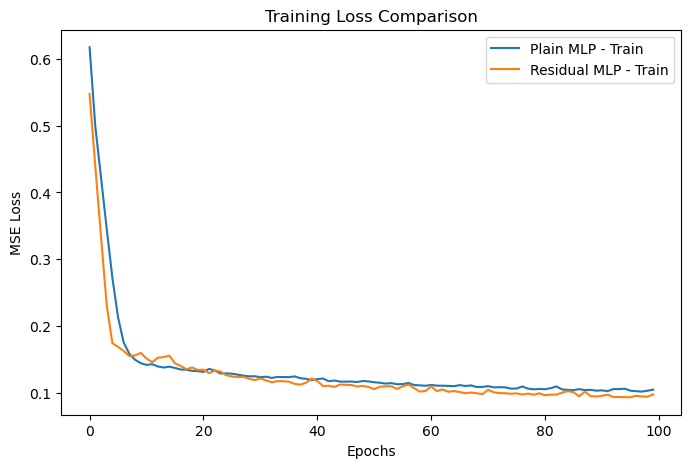

In [25]:
plt.figure(figsize=(8,5))
plt.plot(history_plain.history['loss'], label='Plain MLP - Train')
plt.plot(history_res.history['loss'], label='Residual MLP - Train')
plt.title("Training Loss Comparison")
plt.xlabel("Epochs")
plt.ylabel("MSE Loss")
plt.legend()
plt.show()